<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning # article on epochs

In [ ]:
!pip install ultralytics # Import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO

In [ ]:
# Code for webcam pt. 1 # will we be using webcam or dataframe?

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


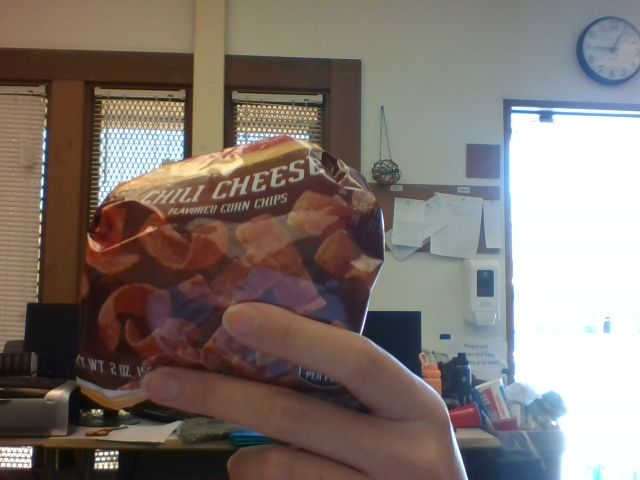

In [ ]:
# Code for webcame pt. 2

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

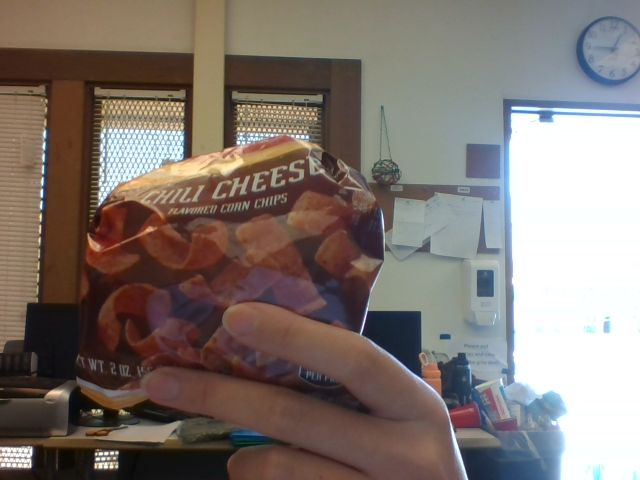

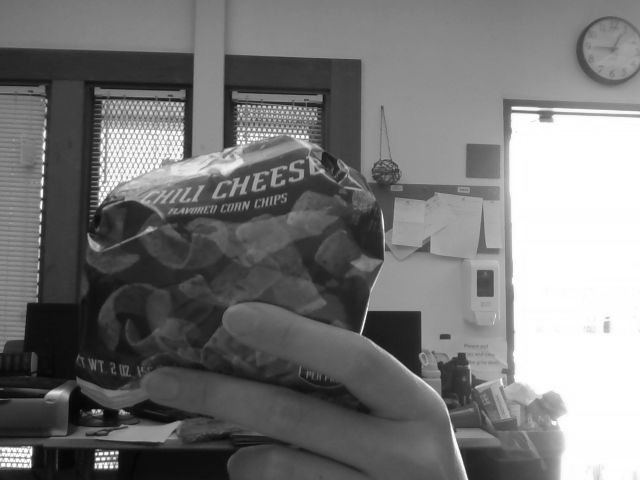

In [ ]:
# Normalize the image
import cv2
from google.colab.patches import cv2_imshow

# Read color image
image = cv2.imread("photo.jpg")

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize grayscale image
normalized_gray_image = cv2.normalize(
    gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Convert normalized grayscale image back to color
normalized_color_image = cv2.cvtColor(normalized_gray_image, cv2.COLOR_GRAY2BGR)

# Display original and normalized images, if you need for error correction
cv2_imshow(image)
cv2_imshow(normalized_color_image)

In [ ]:
model = YOLO("yolov5n.pt") # smallest, fastest yolov5 model (may change later to accomodate for whatever)

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 122MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#we need to copy dataset_10 and import it into our own drives (it's originally in "shared with me" location, so requires alter to go with code)
model.train(data = "/content/drive/MyDrive/DATASET_V2/data.yaml", epochs = 50, model="yolov5n.pt") # still need a dataset to train the model and then incorporate into Koleman's model to ensure recyclables, trash, and compost can be identified.

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/drive/MyDrive/DATASET_V2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 134MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DATASET_V2/train/labels... 961 images, 0 backgrounds, 0 corrupt: 100%|██████████| 961/961 [04:04<00:00,  3.93it/s]


train: New cache created: /content/drive/MyDrive/DATASET_V2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 139, len(boxes) = 1959. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DATASET_V2/valid/labels... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [01:01<00:00,  3.92it/s]

val: New cache created: /content/drive/MyDrive/DATASET_V2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 37, len(boxes) = 549. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.62G      1.255      2.553      1.571          2        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]

                   all        240        549      0.426      0.291      0.287      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.26G      1.309      2.169      1.618          4        640: 100%|██████████| 61/61 [00:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        240        549      0.322      0.311      0.232        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.3G      1.359      2.112       1.65          2        640: 100%|██████████| 61/61 [00:24<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        240        549      0.289      0.369      0.292      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.28G      1.403       2.06      1.679         15        640: 100%|██████████| 61/61 [00:26<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        240        549      0.261      0.328      0.249      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.27G      1.401      1.989      1.687          4        640: 100%|██████████| 61/61 [00:25<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        240        549      0.241      0.383      0.247      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G       1.38      1.929       1.67          7        640: 100%|██████████| 61/61 [00:28<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        240        549      0.428      0.331      0.322      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.29G      1.316      1.804       1.63          4        640: 100%|██████████| 61/61 [00:26<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all        240        549      0.289      0.415      0.296      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.28G      1.337      1.814      1.639          2        640: 100%|██████████| 61/61 [00:25<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        240        549      0.486       0.44      0.414      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.26G       1.35      1.788      1.648          2        640: 100%|██████████| 61/61 [00:23<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all        240        549       0.42      0.471      0.391      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.27G      1.321      1.725      1.601          4        640: 100%|██████████| 61/61 [00:28<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]

                   all        240        549      0.397      0.407       0.37      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.34G      1.313      1.649      1.609          6        640: 100%|██████████| 61/61 [00:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        240        549      0.418      0.459      0.439      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.25G      1.301      1.666      1.617          7        640: 100%|██████████| 61/61 [00:29<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all        240        549      0.416      0.429       0.38      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.28G      1.311      1.603      1.605          3        640: 100%|██████████| 61/61 [00:28<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        240        549      0.477      0.422      0.414      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.26G      1.276      1.574      1.574          3        640: 100%|██████████| 61/61 [00:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        240        549      0.538      0.449      0.486      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G       1.29      1.591      1.587          2        640: 100%|██████████| 61/61 [00:25<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]

                   all        240        549      0.342      0.356      0.303      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.27G      1.255      1.542      1.573          3        640: 100%|██████████| 61/61 [00:25<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


                   all        240        549      0.439       0.47      0.431      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.28G      1.239      1.483      1.555          6        640: 100%|██████████| 61/61 [00:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]


                   all        240        549      0.487       0.47      0.458      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.26G       1.26      1.512       1.58          1        640: 100%|██████████| 61/61 [00:28<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        240        549      0.523      0.502      0.481      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G      1.271      1.481      1.569          1        640: 100%|██████████| 61/61 [00:24<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

                   all        240        549      0.535      0.456      0.466      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.25G      1.208      1.463      1.526          8        640: 100%|██████████| 61/61 [00:27<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        240        549      0.561      0.491      0.528      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.28G      1.224      1.391      1.538          3        640: 100%|██████████| 61/61 [00:24<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


                   all        240        549      0.493      0.504       0.47      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.29G      1.221      1.418      1.536          4        640: 100%|██████████| 61/61 [00:25<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all        240        549      0.568      0.463      0.495      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.29G      1.185      1.353      1.487          3        640: 100%|██████████| 61/61 [00:25<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        240        549      0.487      0.517      0.495      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.27G      1.198      1.333      1.516          2        640: 100%|██████████| 61/61 [00:26<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]


                   all        240        549      0.562      0.522      0.537      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.28G      1.216      1.363      1.509          2        640: 100%|██████████| 61/61 [00:26<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        240        549      0.544      0.572      0.531      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.26G      1.175      1.314      1.485          5        640: 100%|██████████| 61/61 [00:25<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        240        549       0.58      0.556      0.539      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.27G      1.156      1.248      1.452         24        640: 100%|██████████| 61/61 [00:24<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]

                   all        240        549      0.565       0.52       0.53      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G      1.167      1.257      1.474          5        640: 100%|██████████| 61/61 [00:27<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        240        549      0.488      0.535      0.489        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.28G      1.181      1.272      1.499          3        640: 100%|██████████| 61/61 [00:24<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        240        549      0.525      0.496      0.482      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.27G      1.144      1.193      1.455          4        640: 100%|██████████| 61/61 [00:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


                   all        240        549      0.621        0.5      0.555      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.29G      1.116       1.21       1.44          7        640: 100%|██████████| 61/61 [00:26<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        240        549      0.561      0.534      0.538      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.28G      1.144      1.224      1.444         15        640: 100%|██████████| 61/61 [00:23<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        240        549      0.641      0.538      0.587      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.27G      1.106       1.16      1.423          4        640: 100%|██████████| 61/61 [00:26<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        240        549      0.605      0.586      0.611      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.29G      1.108      1.178      1.426          4        640: 100%|██████████| 61/61 [00:25<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        240        549      0.616       0.58       0.59      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.24G      1.114      1.173      1.442          6        640: 100%|██████████| 61/61 [00:24<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]

                   all        240        549      0.604       0.53      0.558       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G      1.098      1.116      1.435          4        640: 100%|██████████| 61/61 [00:31<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        240        549      0.603       0.58      0.585      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.27G       1.09      1.118      1.423          7        640: 100%|██████████| 61/61 [00:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        240        549      0.594      0.548      0.569       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.29G      1.088      1.108        1.4          2        640: 100%|██████████| 61/61 [00:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        240        549      0.681      0.505      0.588      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.26G      1.108      1.077      1.446          1        640: 100%|██████████| 61/61 [00:25<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        240        549       0.67      0.578      0.617      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.28G      1.052      1.081      1.406          4        640: 100%|██████████| 61/61 [00:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        240        549      0.629      0.539      0.577      0.361


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G      1.069       1.07      1.492          1        640: 100%|██████████| 61/61 [00:29<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        240        549      0.617      0.606      0.598      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.31G      1.032     0.9982      1.487          1        640: 100%|██████████| 61/61 [00:28<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        240        549      0.674      0.609      0.627        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.26G      1.005     0.9793      1.439          3        640: 100%|██████████| 61/61 [00:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        240        549      0.706      0.567       0.63      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.25G     0.9696     0.8749      1.414          1        640: 100%|██████████| 61/61 [00:25<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        240        549       0.67      0.615      0.644      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.27G     0.9881     0.8786      1.423          1        640: 100%|██████████| 61/61 [00:23<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        240        549      0.658      0.616      0.641      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.26G     0.9614     0.8486      1.394          1        640: 100%|██████████| 61/61 [00:26<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        240        549      0.666      0.584      0.638      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G      0.942     0.8677      1.385          1        640: 100%|██████████| 61/61 [00:23<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

                   all        240        549      0.681      0.613      0.636      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.25G     0.9687     0.8554      1.408          1        640: 100%|██████████| 61/61 [00:30<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        240        549       0.73      0.579      0.643      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.28G     0.9562     0.8055      1.412          2        640: 100%|██████████| 61/61 [00:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        240        549      0.661       0.62      0.642      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.26G     0.9557     0.8298       1.42          1        640: 100%|██████████| 61/61 [00:26<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        240        549      0.676      0.633      0.644      0.402



50 epochs completed in 0.444 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2503529 parameters, 0 gradients, 7.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


                   all        240        549       0.67      0.615      0.644      0.408
               compost         57        144      0.529      0.542      0.503      0.319
            recyclable        111        211      0.802      0.701      0.783      0.514
                 trash         76        194      0.679      0.603      0.645       0.39
Speed: 0.5ms preprocess, 2.6ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be4b82a54e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
result = model.predict("wire.jpg") # why are there no detections? maybe we need more epochs to train the dataset # format of files matters in YOLOv5


image 1/1 /content/wire.jpg: 448x640 1 trash, 13.9ms
Speed: 3.6ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
result = result[0]
len(result.boxes)

1

In [ ]:
print(result.names)

{0: 'compost', 1: 'recyclable', 2: 'trash'}


In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  if class_id in ["compost"]:
    print("compostable material")
    label = box.cls[0].item()
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type: " , label)
    print("Coordinates: ", cords)
    print("Probability: ", prob)
    print("---")

  elif class_id in ["recyclable"]:
    print("recycable material")
    label = box.cls[0].item()
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type: " , label)
    print("Coordinates: ", cords)
    print("Probability: ", prob)
    print("---")

  else:
    print("trashable material")
    label = box.cls[0].item()
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type: " , label)
    print("Coordinates: ", cords)
    print("Probability: ", prob)
    print("---")

trashable material
Object type:  2.0
Coordinates:  [172, 66, 1745, 1254]
Probability:  0.8847000002861023
---


In [ ]:
from PIL import Image
Image.fromarray(result.plot()[:, :, ::-1])

In [ ]:
#scaled =

In [ ]:
#normalization, finetuning data
#learning rate, follows AI model or not at all?
#10% and 1 images works... using our model!
#DO WE NEED TO FOLLOW AN AI MODEL TO MAKE OUR OBJECT DETECTION MODEL SUCCESSFUL?